Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Configure visuals
sns.set(style='whitegrid', palette='Set2')
plt.rcParams["figure.figsize"] = (6,4)

Load & Clean Data

In [2]:
# Load the dataset
data = pd.read_csv("Student_Performance.csv")
# Clean column names
data.columns = data.columns.str.strip().str.replace(' ', '_')
# Cast object type
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].astype('category')
# Show basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Hours_Studied                     10000 non-null  int64   
 1   Previous_Scores                   10000 non-null  int64   
 2   Extracurricular_Activities        10000 non-null  category
 3   Sleep_Hours                       10000 non-null  int64   
 4   Sample_Question_Papers_Practiced  10000 non-null  int64   
 5   Performance_Index                 10000 non-null  float64 
dtypes: category(1), float64(1), int64(4)
memory usage: 400.6 KB
None


Initial Checks

In [3]:
print("Missing values per column:\n", data.isna().sum())
print("Duplicate rows:", data.duplicated().sum())

Missing values per column:
 Hours_Studied                       0
Previous_Scores                     0
Extracurricular_Activities          0
Sleep_Hours                         0
Sample_Question_Papers_Practiced    0
Performance_Index                   0
dtype: int64
Duplicate rows: 127


A. Numerical Summary

In [4]:
display(data.describe())

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


B. Count Plots for Categorical

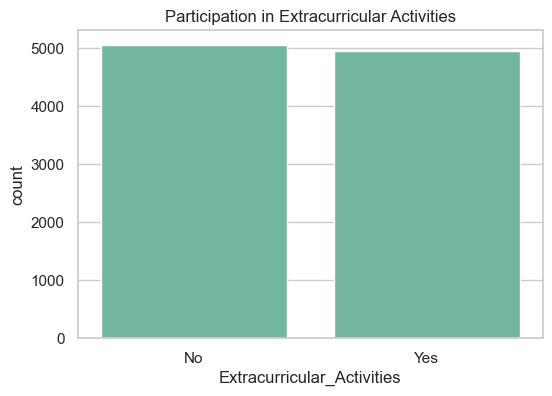

In [5]:
sns.countplot(data=data, x='Extracurricular_Activities')
plt.title("Participation in Extracurricular Activities")
plt.show()

C. Histograms for numerical features(Univariate Plots)

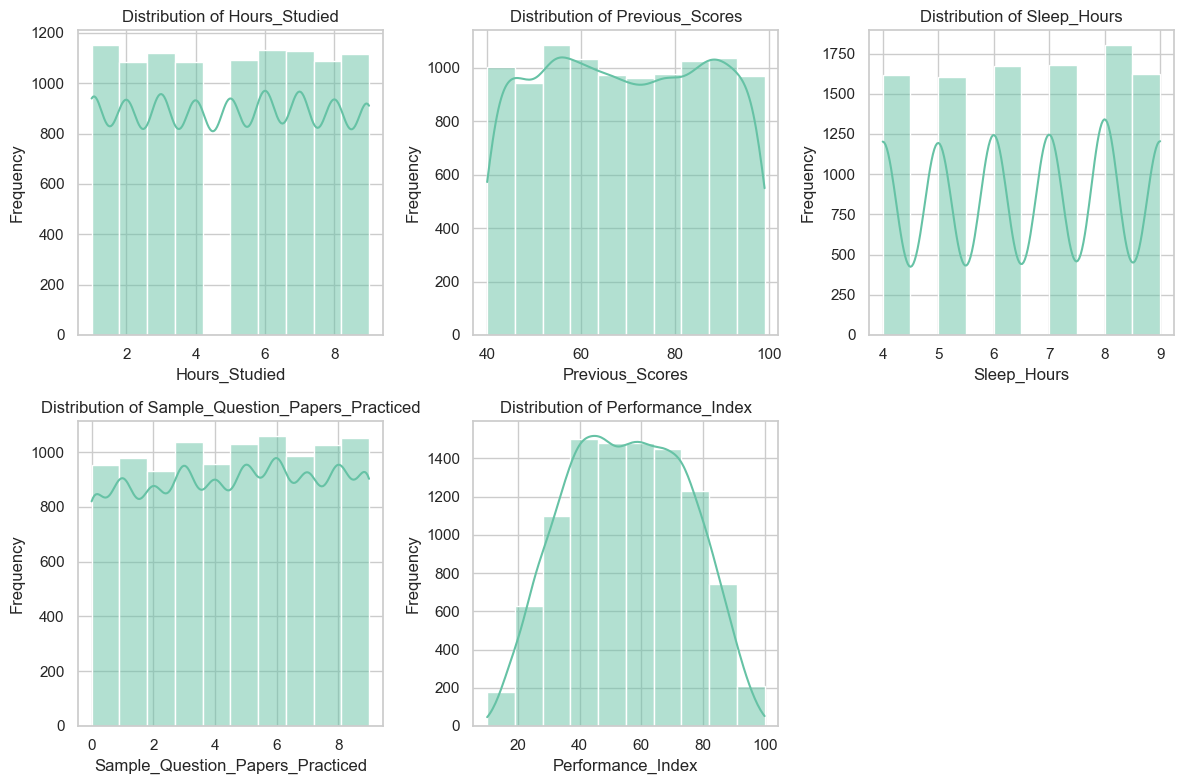

In [6]:
numerical_cols = ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Sample_Question_Papers_Practiced', 'Performance_Index']

plt.figure(figsize=(12, 8)) 

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    sns.histplot(data[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Bivariate Plots

A) Hours Studied vs Performance Index 

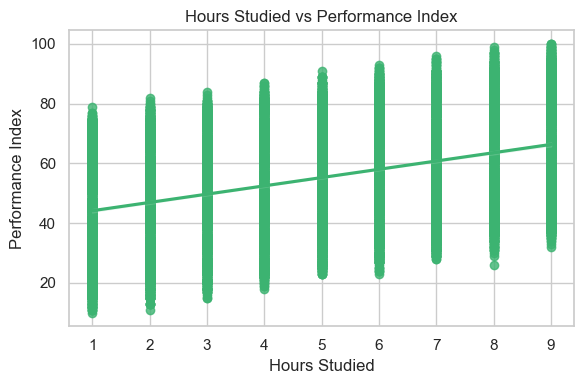

In [7]:
plt.figure(figsize=(6, 4))
sns.regplot(data=data, x='Hours_Studied', y='Performance_Index', color='mediumseagreen')
plt.title("Hours Studied vs Performance Index")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.tight_layout()
plt.show()

B)Previous Scores vs Performance Index 

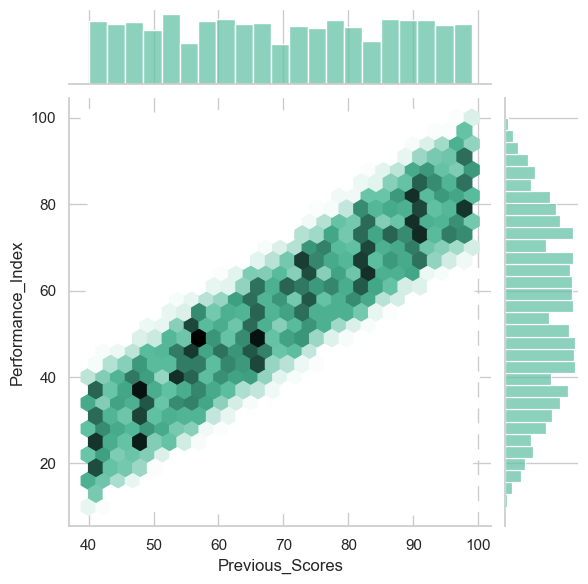

In [8]:
sns.jointplot(data=data, x='Previous_Scores', y='Performance_Index', kind='hex', height=6)

C)Sleep Hours vs Performance Index

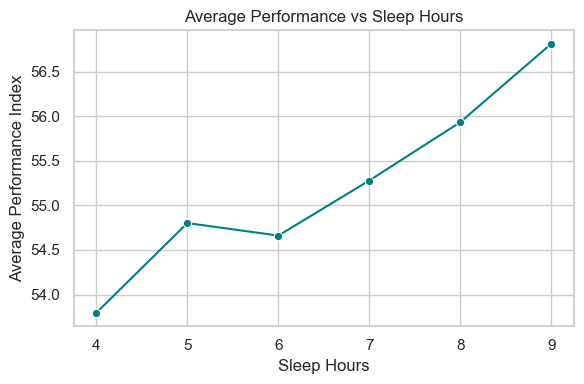

In [9]:
avg_perf = data.groupby('Sleep_Hours')['Performance_Index'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(data=avg_perf, x='Sleep_Hours', y='Performance_Index', marker='o', color='teal')
plt.title("Average Performance vs Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Average Performance Index")
plt.tight_layout()
plt.show()

Preprocessing

In [10]:
# Encode categorical column
data['Extracurricular_Activities'] = LabelEncoder().fit_transform(data['Extracurricular_Activities'])

# Define features and target
X = data.drop("Performance_Index", axis=1)
y = data["Performance_Index"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluation

MAE: 1.612
R² Score: 0.9889704960519785


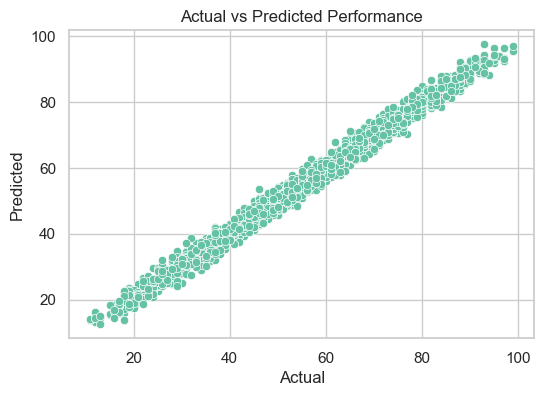

In [12]:
y_pred = np.round(model.predict(X_test), 1)

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Performance")
plt.show()

Feature Importance

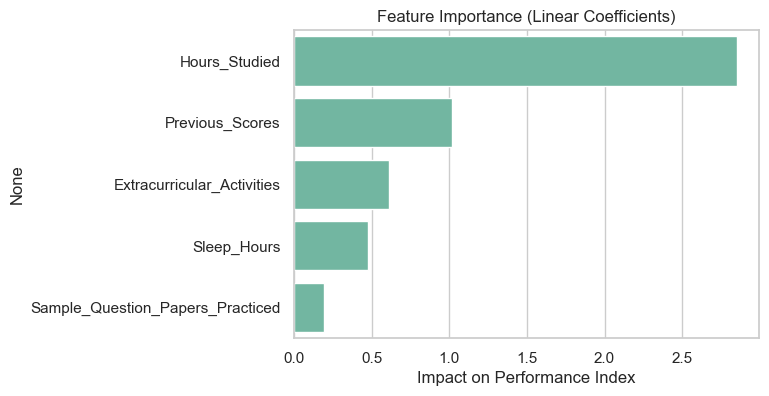

Model Intercept: -33.921946215556126


In [13]:
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=coefficients.values, y=coefficients.index)
plt.title("Feature Importance (Linear Coefficients)")
plt.xlabel("Impact on Performance Index")
plt.show()

print("Model Intercept:", model.intercept_)


Save Model

In [14]:
joblib.dump(model, "student_performance_model.pkl")


['student_performance_model.pkl']

In [15]:
# Use one row from X with column names preserved
sample = X.iloc[[0]]  # Note the double brackets [[]] to keep it as a DataFrame

# Predict
predicted_value = model.predict(sample)

print("Predicted:", predicted_value[0])
print("Actual:", y.iloc[0])

Predicted: 91.82019446792523
Actual: 91.0
